# Experiments

In [1]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.3 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=37b77559108e78e718e204ad0805caabb16e7fa6e171c81f4abba63e78020eb9
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


In [3]:
# import datasets
# import linear
# import loss
# import main
# import model
# import utils

import os
os.environ["WANDB_CONSOLE"] = "off"

import matplotlib.pyplot as plt
import pandas as pd
import wandb
import numpy as np
import seaborn as sns
sns.set(palette="Set2", font_scale=1.3)

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
!cp -R /content/plots /content/drive/MyDrive

In [5]:
api = wandb.Api()
wandb.init(entity="m1p_research")

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin


## Baseline Reproduction

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "Contrastive" \
    --root "/content/" \
    --root_out "/content/logs_biased" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.11
wandb: Run data is saved locally in /content/logs/wandb/run-20230314_110257-zmva9srn
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run sweet-potato-cobbler-10
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/zmva9srn
2023-03-14 11:02:57.511841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 11:02:59.056345: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.

In [ ]:
# Training SimCLR with DebiasedNeg loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedNeg" \
    --root "/content/" \
    --root_out "/content/logs_debiased" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.11
wandb: Run data is saved locally in /content/logs_debiased/wandb/run-20230314_134417-6iuz8868
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run hazelnut-bun-11
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/6iuz8868
2023-03-14 13:44:17.687166: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 13:44:19.079651: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer

In [ ]:
# Training SimCLR with DebiasedPosV2 loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedPosV2" \
    --root "/content/" \
    --root_out "/content/logs" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.11
wandb: Run data is saved locally in /content/logs/wandb/run-20230314_191323-v9snm8lo
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run strawberry-bun-22
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/v9snm8lo
2023-03-14 19:13:24.052979: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 19:13:24.970889: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: 

## Drop False Negatives

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "Contrastive" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_dropfn_contrastive" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --drop_fn \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.14.0
wandb: Run data is saved locally in /content/drive/MyDrive/logs_dropfn_contrastive/wandb/run-20230326_104432-why1lc38
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run efficient-lion-42
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/why1lc38
2023-03-26 10:44:32.720256: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 10:44:33.742905: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.s

In [ ]:
# Training SimCLR with DebiasedNeg loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedNeg" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_dropfn_debiasedneg" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --drop_fn \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.14.0
wandb: Run data is saved locally in /content/drive/MyDrive/logs_dropfn_debiasedneg/wandb/run-20230326_130700-jej7fqiw
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run faithful-snowball-44
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/jej7fqiw
2023-03-26 13:07:01.114544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 13:07:02.181441: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfe

In [ ]:
# Training SimCLR with DebiasedPosV2 loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedPosV2" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_dropfn_debiasedpos" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --drop_fn \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.14.0
wandb: Run data is saved locally in /content/drive/MyDrive/logs_dropfn_debiasedpos/wandb/run-20230326_151528-yyjcip5a
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run legendary-firefly-45
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/yyjcip5a
2023-03-26 15:15:29.127085: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 15:15:30.196473: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfe

## Add False Positives

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "Contrastive" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_noise_contrastive" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --noise_frac 0.3 \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.14.0
wandb: Run data is saved locally in /content/drive/MyDrive/logs_noise_contrastive/wandb/run-20230323_174107-w3ak7gwk
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run young-rain-26
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/w3ak7gwk
2023-03-23 17:41:07.401179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 17:41:09.002314: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7';

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedNeg" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_noise_debiasedneg" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --noise_frac 0.3 \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.14.0
wandb: Run data is saved locally in /content/drive/MyDrive/logs_noise_debiasedneg/wandb/run-20230323_214858-gy89sr4o
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run clear-frost-28
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/gy89sr4o
2023-03-23 21:48:58.923634: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 21:49:00.057455: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedPosV2" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_noise_debiasedpos" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --noise_frac 0.3 \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.14.0
wandb: Run data is saved locally in /content/drive/MyDrive/logs_noise_debiasedpos/wandb/run-20230324_000511-l1qkgy09
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run vocal-paper-29
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/l1qkgy09
2023-03-24 00:05:11.899982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 00:05:13.138830: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'

## M = 2

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "Contrastive" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_M2_contrastive" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --num_pos 2 \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.14.0
wandb: Run data is saved locally in /content/drive/MyDrive/logs_M2_contrastive/wandb/run-20230324_102436-n9mtmzqc
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run comfy-morning-32
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/n9mtmzqc
2023-03-24 10:24:37.518723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 10:24:38.505424: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfe

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedNeg" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_M2_debiasedneg" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --num_pos 2 \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.14.0
wandb: Run data is saved locally in /content/drive/MyDrive/logs_M2_debiasedneg/wandb/run-20230324_144144-n7kh7046
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run eternal-bee-33
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/n7kh7046
2023-03-24 14:41:45.629359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 14:41:47.321162: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedPosV2" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_M2_debiasedpos" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --num_pos 2 \
    --batch_size 512 \
    --epochs 50

wandb: Currently logged in as: lidia-troeshestova (m1p_research). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.14.0
wandb: Run data is saved locally in /content/drive/MyDrive/logs_M2_debiasedpos/wandb/run-20230324_202052-3z2k37g3
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run deft-eon-35
wandb: ⭐️ View project at https://wandb.ai/m1p_research/chingyaoc-dcl
wandb: 🚀 View run at https://wandb.ai/m1p_research/chingyaoc-dcl/runs/3z2k37g3
2023-03-24 20:20:53.073262: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 20:20:54.577596: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.

## Plots


In [6]:
runs = api.runs("chingyaoc-dcl")
df = pd.DataFrame.from_records([r.config for r in runs])

In [8]:
colors_map = {"DebiasedPos": "lightcoral", "DebiasedNeg": "turquoise", "Contrastive": "sandybrown"}
biased, debiasedneg, debiasedpos = [], [], []
biased.append(pd.read_csv("/content/biased.csv")["cifar10-resnet18-biased - acc1"])
biased.append(pd.read_csv("/content/biased5.csv")["cifar10-resnet18-biased - acc5"])
debiasedneg.append(pd.read_csv("/content/debiasedneg.csv")["cifar10-resnet18-debiasedNeg - acc1"])
debiasedneg.append(pd.read_csv("/content/debiasedneg5.csv")["cifar10-resnet18-debiasedNeg - acc5"])
debiasedpos.append(pd.read_csv("/content/debiasedpos.csv")["cifar10-resnet18-debiasedPos - acc1"])
debiasedpos.append(pd.read_csv("/content/debiasedpos5.csv")["cifar10-resnet18-debiasedPos - acc5"])
runs = api.runs("chingyaoc-dcl")
df = pd.DataFrame.from_records([r.config for r in runs])
len(runs)

15

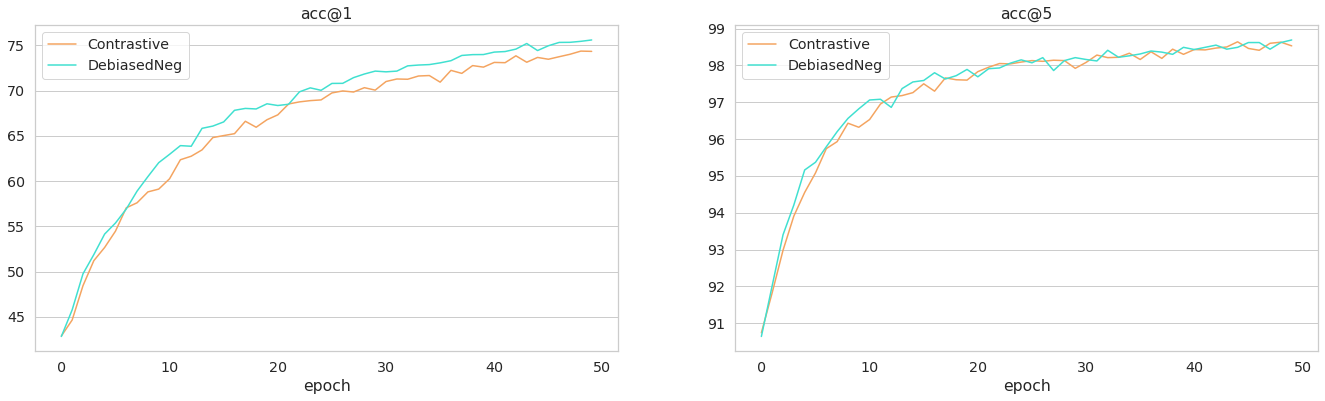

In [13]:
# base
sns.set_style("whitegrid")
names = ["Contrastive", "DebiasedNeg", "DebiasedPos"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 6))
for i, (ax, metric) in enumerate(zip([ax1, ax2], ["acc1", "acc5"])):
    ax.plot(biased[i], color=colors_map[names[0]], label=names[0])
    ax.plot(debiasedneg[i], color=colors_map[names[1]], label=names[1])
    ax.legend()
    ax.set_xlabel("epoch")
    ax.grid(axis = "x")
ax1.set_title("acc@1")
ax2.set_title("acc@5")
# plt.suptitle("Accuracy with dropped FN", y=0.95)
plt.savefig("plots/base.png", bbox_inches="tight")
plt.show()

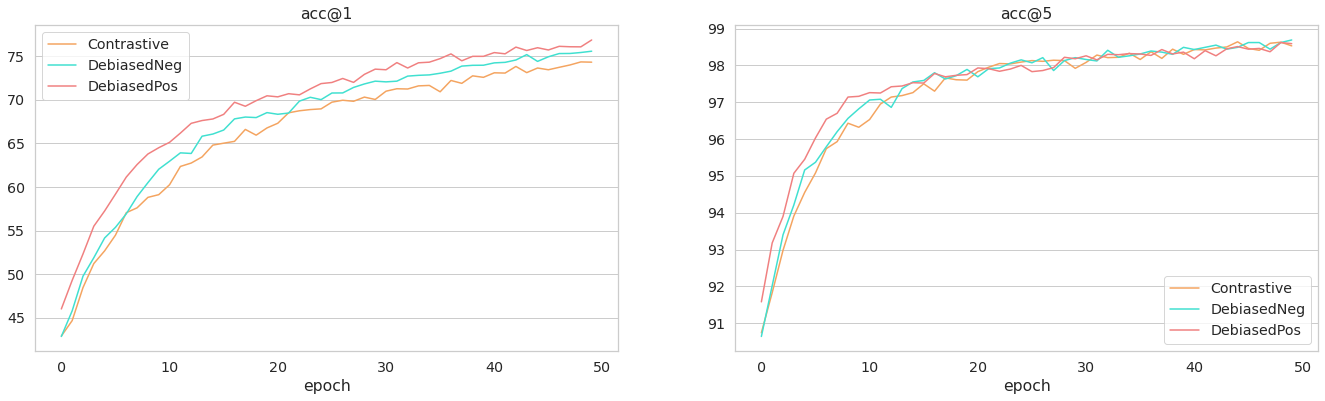

In [14]:
# base + debiasedPos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 6))
for i, (ax, metric) in enumerate(zip([ax1, ax2], ["acc1", "acc5"])):
    ax.plot(biased[i], color=colors_map[names[0]], label=names[0])
    ax.plot(debiasedneg[i], color=colors_map[names[1]], label=names[1])
    ax.plot(debiasedpos[i], color=colors_map[names[2]], label=names[2])
    ax.legend()
    ax.set_xlabel("epoch")
    ax.grid(axis = "x")
ax1.set_title("acc@1")
ax2.set_title("acc@5")
# plt.suptitle("Accuracy with dropped FN", y=0.95)
plt.savefig("plots/base_debiasedPos.png", bbox_inches="tight")
plt.show()

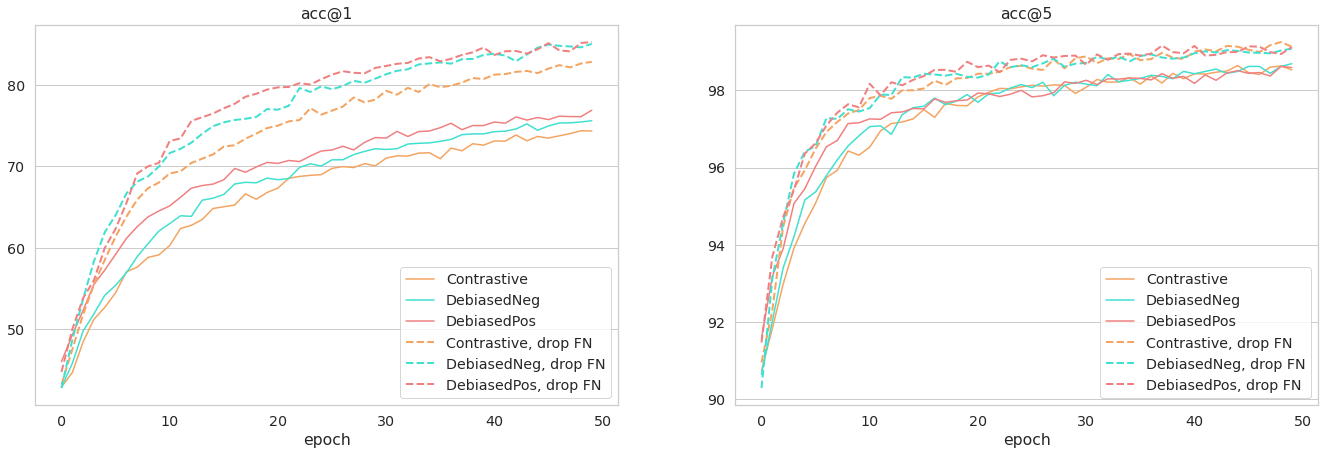

In [17]:
# base vs. dropfn
names_dropfn = [n + ", drop FN" for n in names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 7))
for i, (ax, metric) in enumerate(zip([ax1, ax2], ["acc1", "acc5"])):
    ax.plot(biased[i], color=colors_map[names[0]], label=names[0])
    ax.plot(debiasedneg[i], color=colors_map[names[1]], label=names[1])
    ax.plot(debiasedpos[i], color=colors_map[names[2]], label=names[2])
    ax.plot(runs[-13].history()[metric], color=colors_map[names[0]], lw=2, linestyle="--", label=names_dropfn[0])
    ax.plot(runs[-14].history()[metric], color=colors_map[names[1]], lw=2, linestyle="--", label=names_dropfn[1])
    ax.plot(runs[-15].history()[metric], color=colors_map[names[2]], lw=2, linestyle="--", label=names_dropfn[2])
    ax.legend()
    ax.set_xlabel("epoch")
    ax.grid(axis = "x")
ax1.set_title("acc@1")
ax2.set_title("acc@5")
# plt.suptitle("Accuracy with dropped FN", y=0.95)
plt.savefig("plots/base_vs_dropfn.png", bbox_inches="tight")
plt.show()

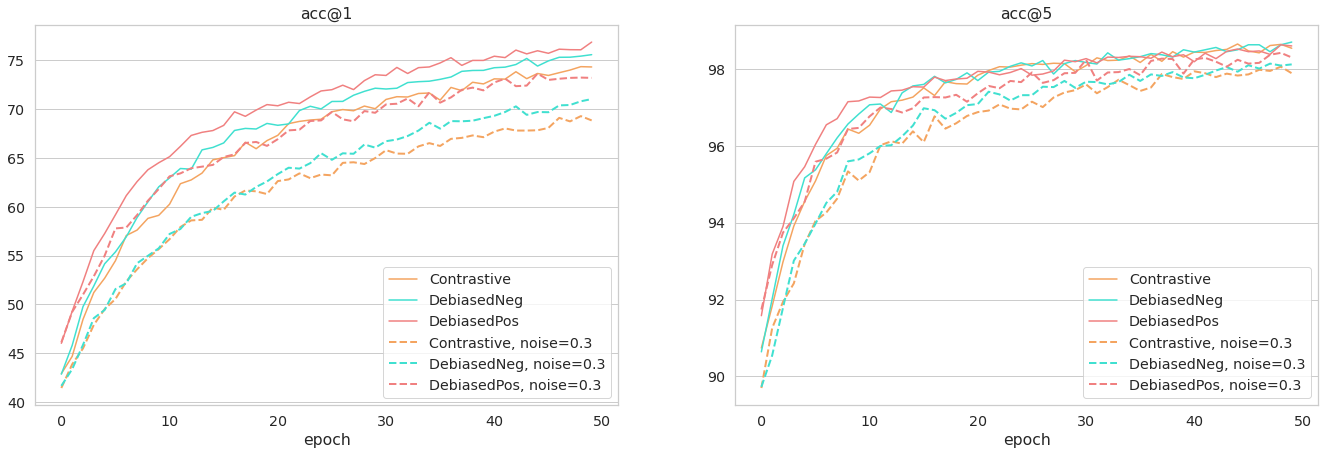

In [20]:
# base vs. noise 0.3
names_noise = [n + ", noise=0.3" for n in names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 7))
for i, (ax, metric) in enumerate(zip([ax1, ax2], ["acc1", "acc5"])):
    ax.plot(biased[i], color=colors_map[names[0]], label=names[0])
    ax.plot(debiasedneg[i], color=colors_map[names[1]], label=names[1])
    ax.plot(debiasedpos[i], color=colors_map[names[2]], label=names[2])
    ax.plot(runs[-7].history()[metric], color=colors_map[names[0]], lw=2, linestyle="--", label=names_noise[0])
    ax.plot(runs[-8].history()[metric], color=colors_map[names[1]], lw=2, linestyle="--", label=names_noise[1])
    ax.plot(runs[-9].history()[metric], color=colors_map[names[2]], lw=2, linestyle="--", label=names_noise[2])
    ax.legend()
    ax.set_xlabel("epoch")
    ax.grid(axis = "x")
ax1.set_title("acc@1")
ax2.set_title("acc@5")
# plt.suptitle("Accuracy with increased FP", y=0.95)
plt.savefig("plots/base_vs_noise.png", bbox_inches="tight")
plt.show()

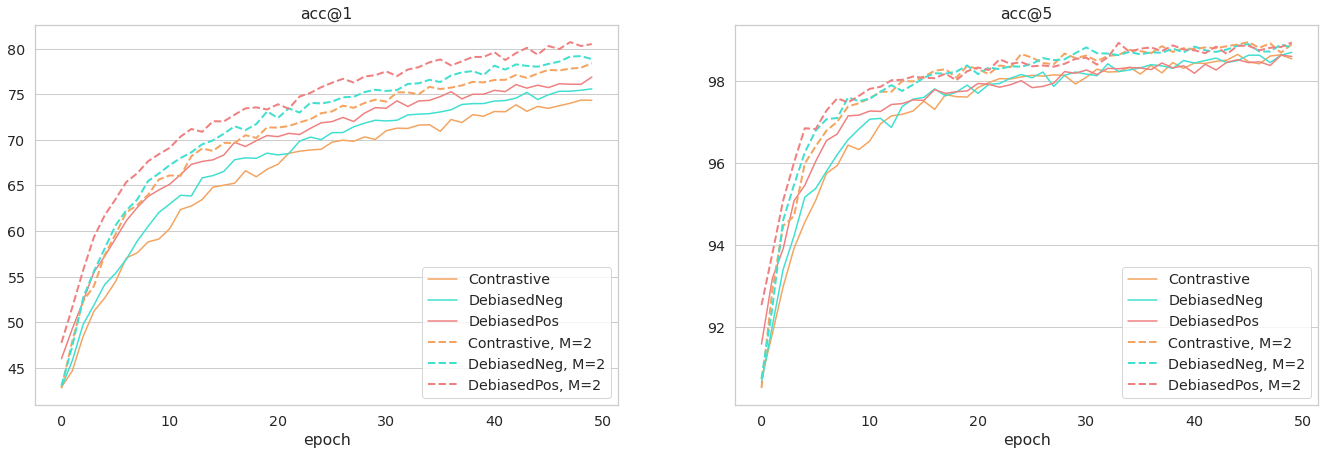

In [21]:
# base vs. M=2
names_numpos= [n + ", M=2" for n in names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 7))
for i, (ax, metric) in enumerate(zip([ax1, ax2], ["acc1", "acc5"])):
    ax.plot(biased[i], color=colors_map[names[0]], label=names[0])
    ax.plot(debiasedneg[i], color=colors_map[names[1]], label=names[1])
    ax.plot(debiasedpos[i], color=colors_map[names[2]], label=names[2])
    ax.plot(runs[-10].history()[metric], color=colors_map[names[0]], lw=2, linestyle="--", label=names_numpos[0])
    ax.plot(runs[-11].history()[metric], color=colors_map[names[1]], lw=2, linestyle="--", label=names_numpos[1])
    ax.plot(runs[-12].history()[metric], color=colors_map[names[2]], lw=2, linestyle="--", label=names_numpos[2])
    ax.legend()
    ax.set_xlabel("epoch")
    ax.grid(axis = "x")
ax1.set_title("acc@1")
ax2.set_title("acc@5")
# plt.suptitle("Accuracy with increased positive sample size M", y=0.95)
plt.savefig("plots/base_vs_M=2.png", bbox_inches="tight")
plt.show()